In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual para que las gráficas se vean bien
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [5]:
df = pd.read_csv("netflix_titles.csv")
df.head()


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
# Ver estructura general del dataset
df.info()
# Ver cuántos valores faltan en cada columna
df.isnull().sum()
# Ver estadísticas básicas de las columnas numéricas
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [10]:
# Llenar valores vacíos en 'country' con "Unknown"
df['country'] = df['country'].fillna("Unknown")

# Llenar valores vacíos en 'date_added' con "Unknown"
df['date_added'] = df['date_added'].fillna("Unknown")


# Convertir 'date_added' a formato de fecha si es posible
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


/tmp/ipython-input-11-2076613344.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="Set2")


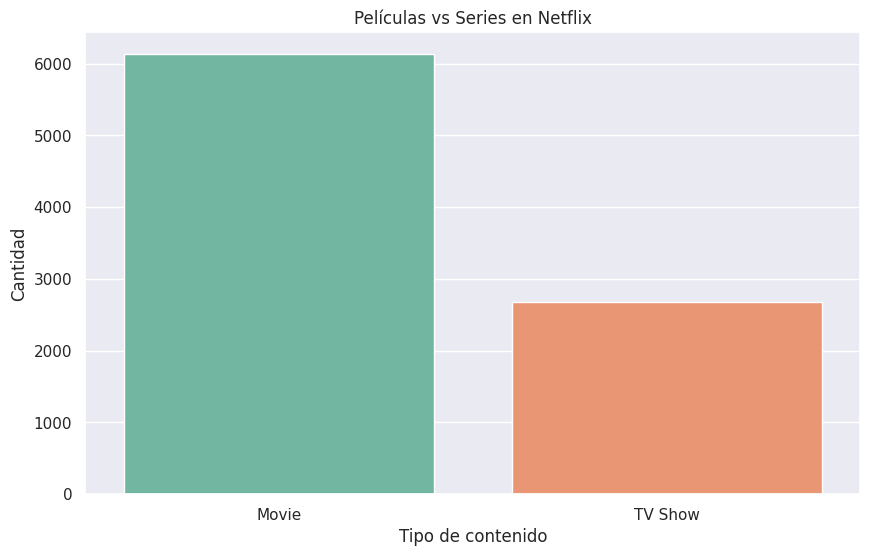

/tmp/ipython-input-11-2076613344.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")


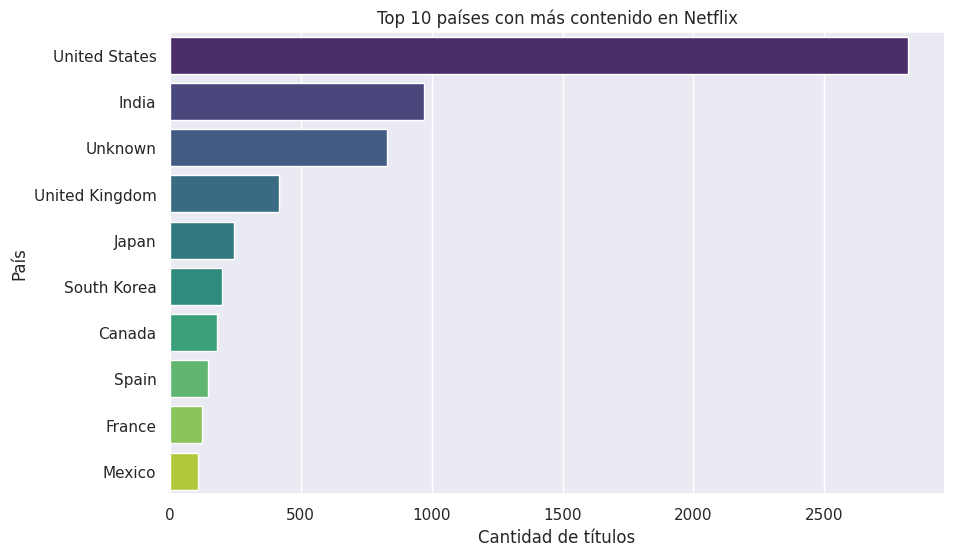

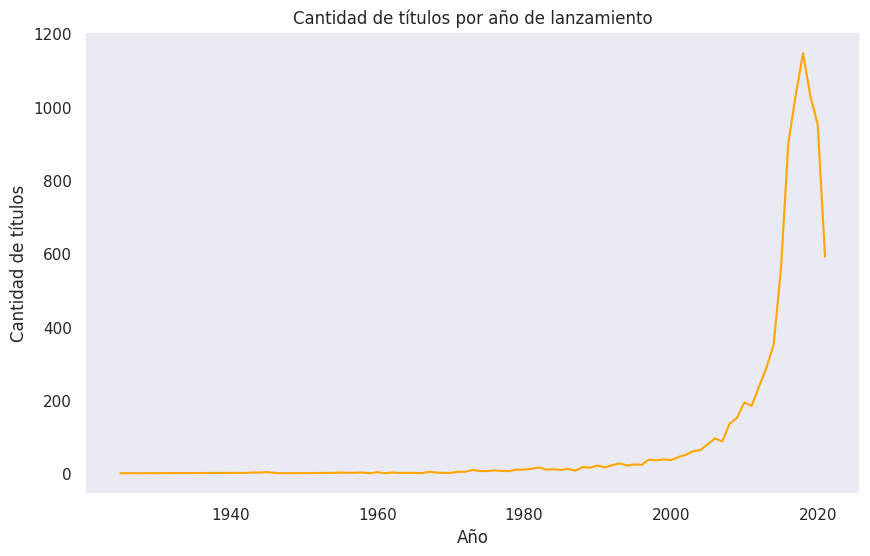

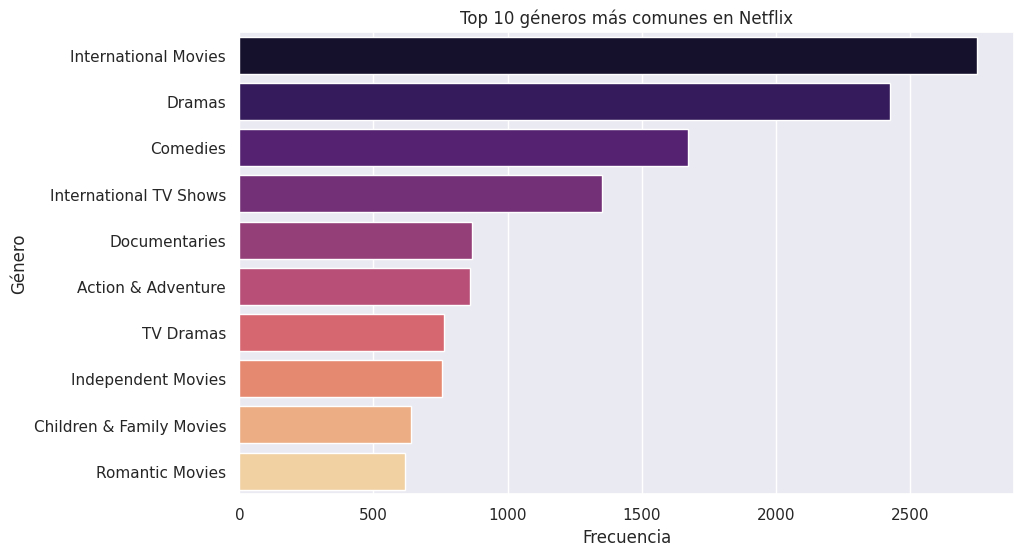

In [11]:
sns.countplot(data=df, x="type", palette="Set2")
plt.title("Películas vs Series en Netflix")
plt.xlabel("Tipo de contenido")
plt.ylabel("Cantidad")
plt.show()
top_countries = df['country'].value_counts().head(10)
sns.barplot(y=top_countries.index, x=top_countries.values, palette="viridis")
plt.title("Top 10 países con más contenido en Netflix")
plt.xlabel("Cantidad de títulos")
plt.ylabel("País")
plt.show()
df['release_year'].value_counts().sort_index().plot(kind="line", color='orange')
plt.title("Cantidad de títulos por año de lanzamiento")
plt.xlabel("Año")
plt.ylabel("Cantidad de títulos")
plt.grid()
plt.show()
from collections import Counter

# Unir todos los géneros en una sola lista
all_genres = ",".join(df['listed_in'].dropna()).split(",")
top_genres = Counter([g.strip() for g in all_genres]).most_common(10)

# Crear DataFrame para graficar
genres_df = pd.DataFrame(top_genres, columns=["Género", "Frecuencia"])
sns.barplot(data=genres_df, x="Frecuencia", y="Género", hue="Género", dodge=False, palette="magma", legend=False)


plt.title("Top 10 géneros más comunes en Netflix")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## 📘 Conclusiones

- La mayoría del contenido en Netflix corresponde a **películas**.
- El país con mayor cantidad de títulos es **Estados Unidos**, seguido por India y Reino Unido.
- Los años con más lanzamientos fueron **2018, 2019 y 2020**.
- Los géneros más frecuentes son **drama, comedia, acción y documentales**.
- Netflix creció rápidamente en la segunda mitad de la década de 2010.

Este análisis muestra cómo se ha desarrollado el catálogo de Netflix en términos de tipo de contenido, producción global y diversidad temática.
